# Displaying Data from [Ilmatieteen laitos](https://www.ilmatieteenlaitos.fi/latauspalvelun-pikaohje)

Processing the data

1. Loading data into a DataFrame from url taking into account the column separator **','** and decimal separator **'.'**
2. deleting column **'snow depth, cm'**
3. The first column of the data shows the time in the form:
> year-month-day hours:minutes:seconds.
4. Using all the fields in the time column (date and time), created a column **'time, s'** in the new DataFrame indicating the time in seconds since the first measurement was taken.
5. Added the column **'Air temperature, degC'** to the new DataFrame.

## Data Visualization

In the graph:

- Time from column **'time, s'** is shown on the *horizontal axis*.
- Air temperature from column **'Air temperature, degC'** is shown on the *vertical axis*.
- Data points are marked with a red dot.
- The data point with the red dot is marked with a legend that reads **'air temperature'**.
- The *horizontal axis* is titled **'time, s'**, and the *vertical axis* is titled **'air temperature 𝑜𝐶'**.
- A grid with a black dashed line is added to the graph.


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

url = 'https://raw.githubusercontent.com/WiljamiT/data-visualization/main/csv/saatiedot.csv'
df = pd.read_csv(url, sep=',', decimal='.')

df.drop(columns=['Snow depth, cm'], inplace=True)

df.head()

Unnamed: 0  Air temperature, degC  Wind speed, m/s  \
0  2020-11-04 13:20:00                    6.5              2.3   
1  2020-11-04 13:30:00                    6.2              2.5   
2  2020-11-04 13:40:00                    5.7              2.3   
3  2020-11-04 13:50:00                    5.7              2.8   
4  2020-11-04 14:00:00                    5.7              3.1   

   Gust speed, m/s  Wind direction, deg  Relative humidity, %  \
0              4.3                187.0                  79.0   
1              3.9                180.0                  80.0   
2              3.5                173.0                  81.0   
3              4.0                164.0                  81.0   
4              4.2                164.0                  83.0   

   Dew-point temperature, degC  Pressure (msl), hPa  Horizontal visibility, m  \
0                          3.1               1011.3                   51434.0   
1                          3.0               1011.4                   53238.0   
2                          2.8               1011.4                   50053.0   
3                          2.7               1011.3                   52636.0   
4                          2.9               1011.1                   50378.0   

   Cloud amount, 1/8  
0                4.0  
1                4.0  
2                4.0  
3                6.0  
4                7.0

In [36]:
time_column = df.columns[0]  
df[time_column] = pd.to_datetime(df[time_column], format='%Y-%m-%d %H:%M:%S')

df['aika, s'] = (df[time_column] - df[time_column][0]).dt.total_seconds()

new_df = df[['aika, s', 'Air temperature, degC']]

print(new_df.head())

   aika, s  Air temperature, degC
0      0.0                    6.5
1    600.0                    6.2
2   1200.0                    5.7
3   1800.0                    5.7
4   2400.0                    5.7


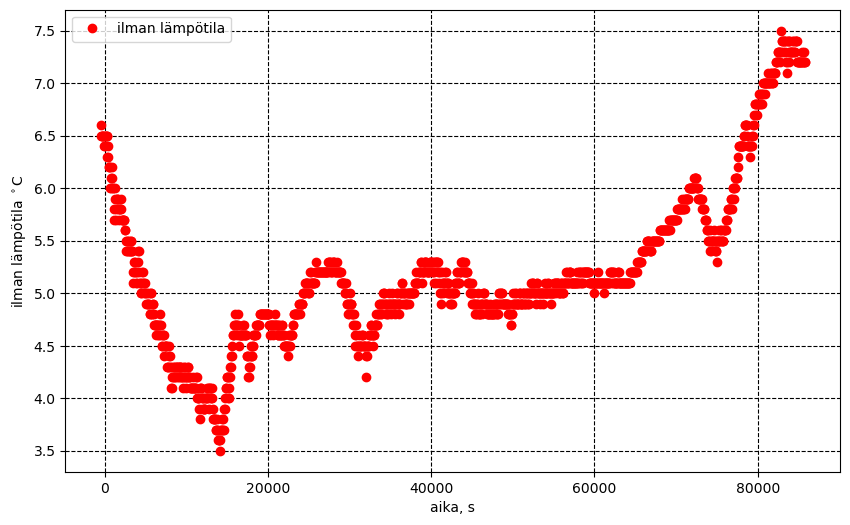

In [40]:
plt.figure(figsize=(10, 6))
plt.plot(new_df['aika, s'], new_df['Air temperature, degC'], 'ro', label='ilman lämpötila')
plt.xlabel('aika, s')
plt.ylabel('ilman lämpötila $^\circ$C')
plt.legend()
plt.grid(True, linestyle='--', color='black')
plt.show()